In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import saxs_data_processing
from saxs_data_processing import io
from saxs_data_processing import manipulate
import glob
import shutil

### Load uuid mapping table


In [2]:
with open('replicate_sample_uuid_mapper.json', 'rt') as f:
    uuid_mapping = json.load(f)

In [3]:
uuid_mapping

{'4bec4e18-80bb-44d9-8508-cc464f14b287': '4fd21940-a331-4524-b730-cf76de1b4d8d',
 '3584700a-8b01-4e59-a53a-1300fd3fac0a': '8933d4b1-8929-4b58-a491-a0c55df30fed',
 'fed3ab35-04e9-4916-8527-8627191a3bdc': '130093e4-2947-4d37-b73a-ed4c23442ab8',
 '32ec16b1-c5b5-4d8b-b396-cd1ad4b740d9': 'a3f7d49b-cc77-4468-aae0-ad451027ddc0',
 '770a433d-0480-4cee-bf12-ce066c24db55': 'f69628da-ff56-4f3a-ba2e-816036b87557',
 '23850c30-c572-41ad-abf0-7e1bd4fa7397': 'eb5c038c-56ff-4457-93db-9b9702e3ff43',
 '4ab46dcc-3395-4e7b-bb87-52e805e12abb': '56898b1b-5aed-4595-ade6-5b73d45a7808',
 '8559907a-1b27-4673-ae0e-602b83d86deb': 'ba91b97c-6a58-431f-99ae-091ae1a16bc8',
 'b683d769-9cd7-454a-b546-4e86afe5e3f4': 'e34d9838-8677-405f-b825-5068facac35e',
 'fe8e4a28-cb6b-4396-adc3-a51f49838d54': '4ccc9a11-4c0b-48a4-848e-edcdd5c8da69',
 '89b8593e-8436-4dfb-8430-1367d273cbc2': '4b56c2d8-0a77-4566-b8fe-51e66454dd75',
 '47d95862-b511-4a42-b8b1-961b605f26a3': 'a6ee3a08-02cd-4703-9d6c-3721dad590c8',
 'a9d67fc5-2e59-4f51-a904-9c

### For each re-made uuid, load esaxs data

In [9]:
saxs_data_fp = '/mnt/c/Users/bgpel/My Drive (bgpelkie@uw.edu) (1)/Research/PozzoResearchGroup/Stober_synthesis/SAXS_data'


In [10]:
import os

In [18]:
replicate_fps = []
replicate_esaxs_fp = []
replicate_data = {}
for key, val in uuid_mapping.items():
    fps = glob.glob(str(saxs_data_fp + f'/**/subtracted/*{val}*.dat'), recursive = True)
    filenames =  [sn.split('/')[-1] for sn in fps]
    num = [int(fn.split('_')[0]) for fn in filenames]
    #print(num)
    if len(num) > 0:
        esaxs_fp = fps[np.argmin(num)]
        replicate_fps.append(esaxs_fp)
        
        data = io.read_1D_data(esaxs_fp)

        replicate_data[val] = data

In [12]:
glob.glob(str(saxs_data_fp + f'/**/subtracted/*{val}*.dat'), recursive = True)

['/mnt/c/Users/bgpel/My Drive (bgpelkie@uw.edu) (1)/Research/PozzoResearchGroup/Stober_synthesis/SAXS_data/2024_10_15_Highlights_replicates/subtracted/03403_C1-T2_b702c675-432e-4034-b542-ef01ad2fd4ff_000_sub.dat',
 '/mnt/c/Users/bgpel/My Drive (bgpelkie@uw.edu) (1)/Research/PozzoResearchGroup/Stober_synthesis/SAXS_data/2024_10_15_Highlights_replicates/subtracted/03404_C1-T2_b702c675-432e-4034-b542-ef01ad2fd4ff_000_sub.dat']

## For each replicate, find it's pair sample


In [19]:
original_fps = []
original_data = {}

In [20]:
for key, val in uuid_mapping.items():
    fps = glob.glob(str(saxs_data_fp + f'/**/subtracted/*{key}*.dat'), recursive = True)
    filenames =  [sn.split('/')[-1] for sn in fps]
    num = [int(fn.split('_')[0]) for fn in filenames]
    #print(num)
    if len(num) > 0:
        esaxs_fp = fps[np.argmin(num)]
        original_fps.append(esaxs_fp)
        
        data = io.read_1D_data(esaxs_fp)

        original_data[key] = data

In [55]:
target_fp = '/mnt/c/Users/bgpel/My Drive (bgpelkie@uw.edu) (1)/Research/PozzoResearchGroup/Stober_synthesis/SAXS_data/2024_10_15_Highlights_replicates/replicate_originals_subtracted'

In [60]:
for fp in original_fps:
    shutil.copy(fp, target_fp)

In [59]:
original_fps

['/mnt/c/Users/bgpel/My Drive (bgpelkie@uw.edu) (1)/Research/PozzoResearchGroup/Stober_synthesis/SAXS_data/2024_10_05_StoberRandomCampaignV2/subtracted/03175_A1-T1_4bec4e18-80bb-44d9-8508-cc464f14b287_000_sub.dat',
 '/mnt/c/Users/bgpel/My Drive (bgpelkie@uw.edu) (1)/Research/PozzoResearchGroup/Stober_synthesis/SAXS_data/2024_10_05_StoberRandomCampaignV2/subtracted/03179_A3-T1_3584700a-8b01-4e59-a53a-1300fd3fac0a_000_sub.dat',
 '/mnt/c/Users/bgpel/My Drive (bgpelkie@uw.edu) (1)/Research/PozzoResearchGroup/Stober_synthesis/SAXS_data/2024_10_05_StoberRandomCampaignV2/subtracted/03185_A6-T1_fed3ab35-04e9-4916-8527-8627191a3bdc_000_sub.dat',
 '/mnt/c/Users/bgpel/My Drive (bgpelkie@uw.edu) (1)/Research/PozzoResearchGroup/Stober_synthesis/SAXS_data/2024_10_05_StoberRandomCampaignV2/subtracted/03187_A7-T1_32ec16b1-c5b5-4d8b-b396-cd1ad4b740d9_000_sub.dat',
 '/mnt/c/Users/bgpel/My Drive (bgpelkie@uw.edu) (1)/Research/PozzoResearchGroup/Stober_synthesis/SAXS_data/2024_10_05_StoberRandomCampaignV2

In [17]:
## Plot each pair

[]

In [42]:
qmin = 0.003
qmax = 0.05

In [43]:
def chop_data(data, qmin, qmax):
    data = data[data['q'] < qmax]
    data = data[data['q'] > qmin]
    return data

Incomplete entry for pair 4bec4e18-80bb-44d9-8508-cc464f14b287:4fd21940-a331-4524-b730-cf76de1b4d8d
Incomplete entry for pair 48117328-d486-4f9f-96ab-b0034fe30cd5:1cd98242-2c09-46dc-8eab-ff593ec4a284


/tmp/ipykernel_418/2887596679.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1)


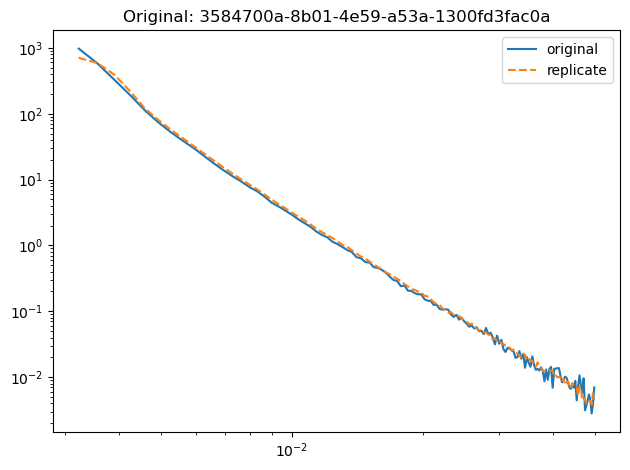

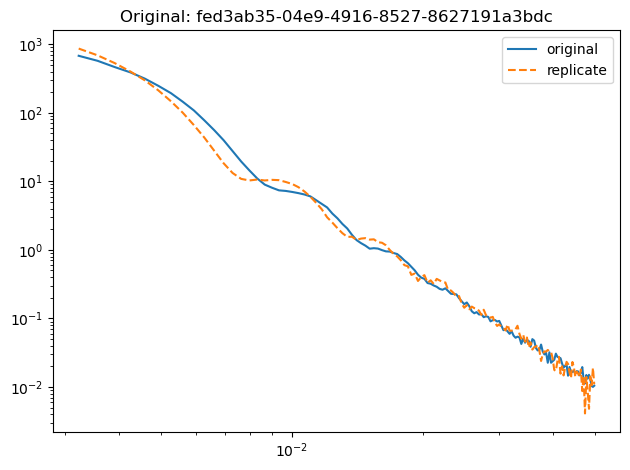

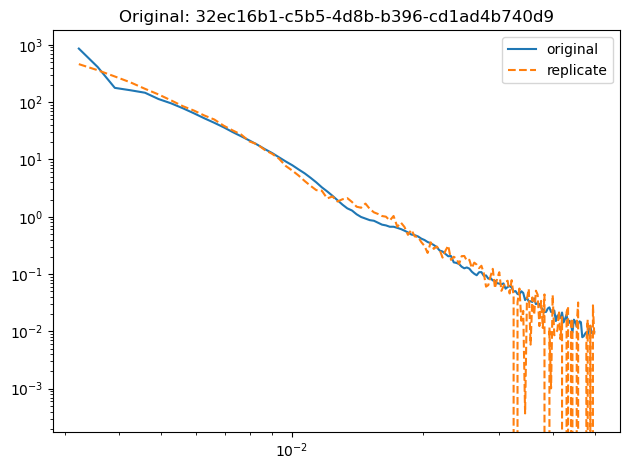

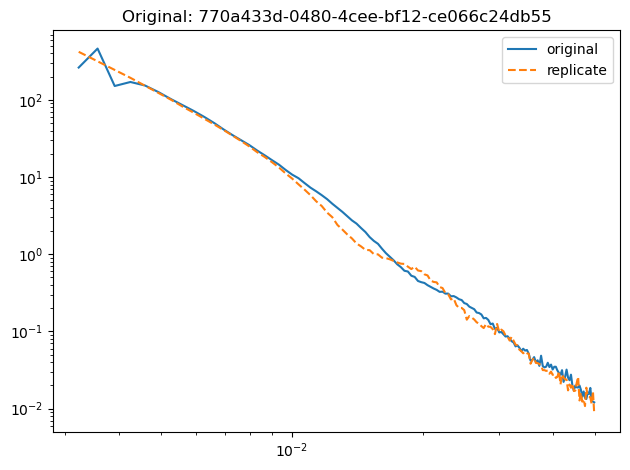

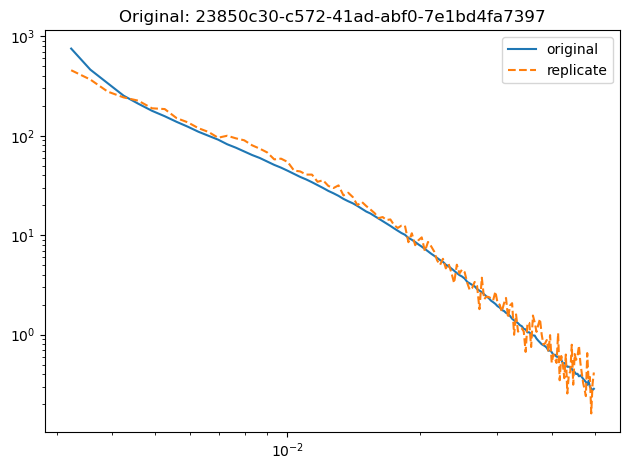

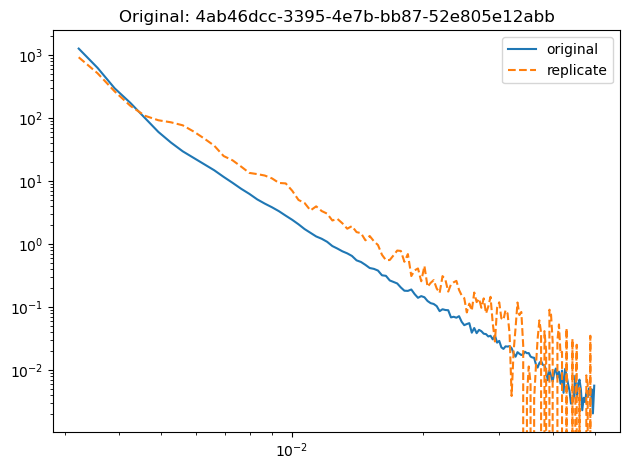

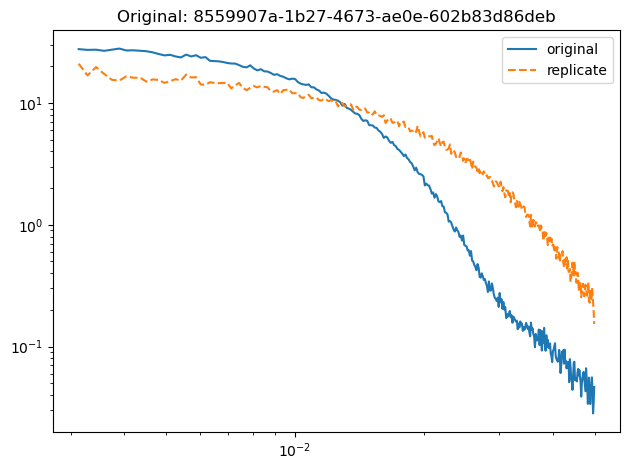

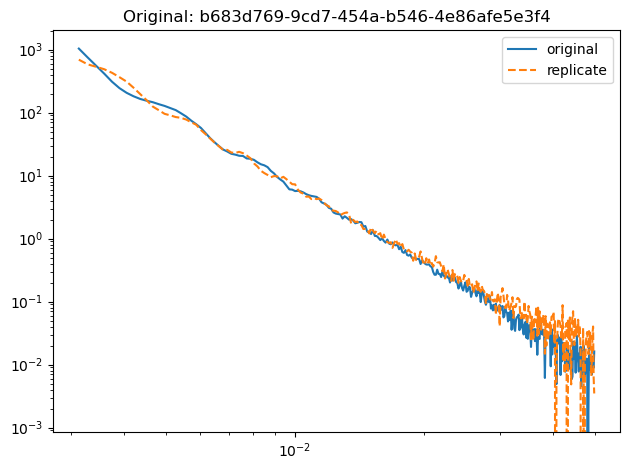

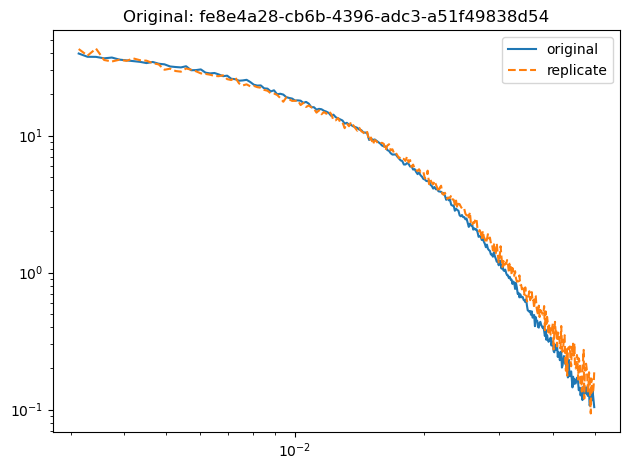

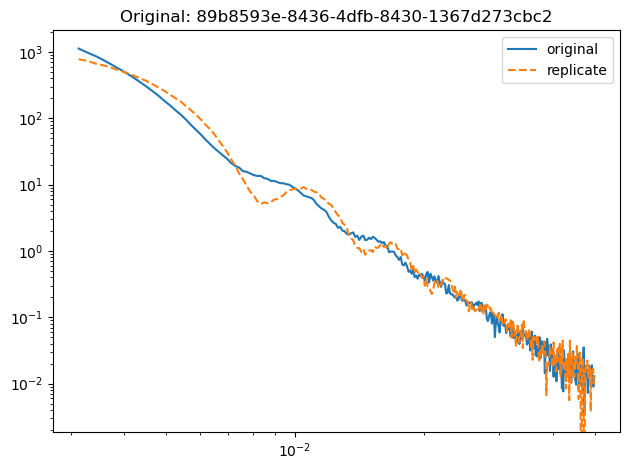

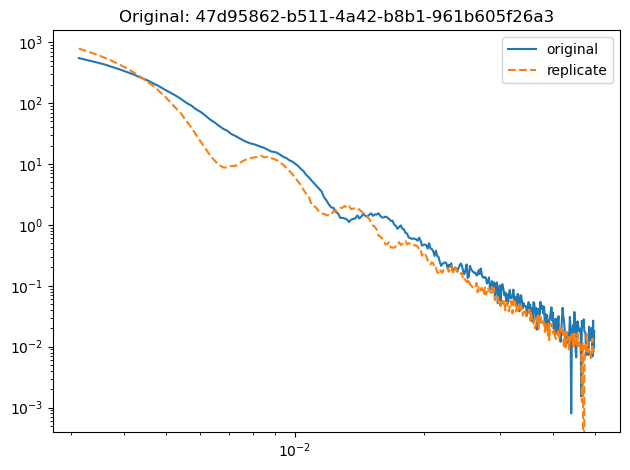

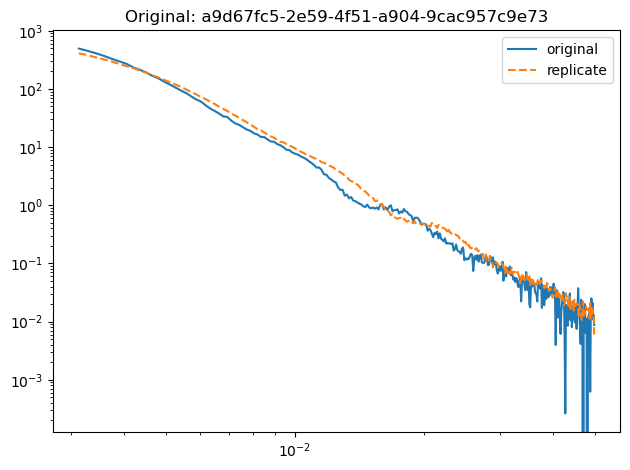

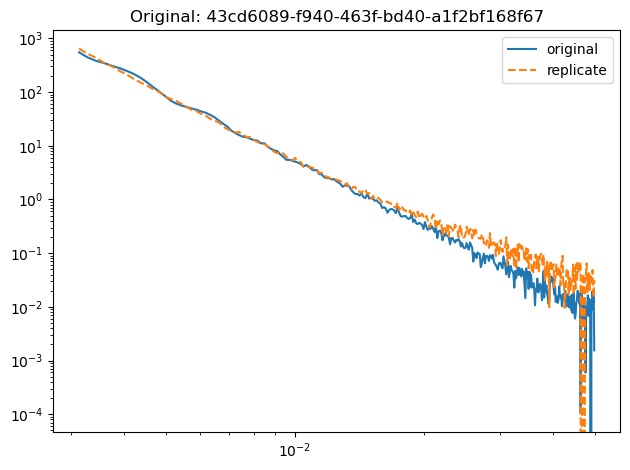

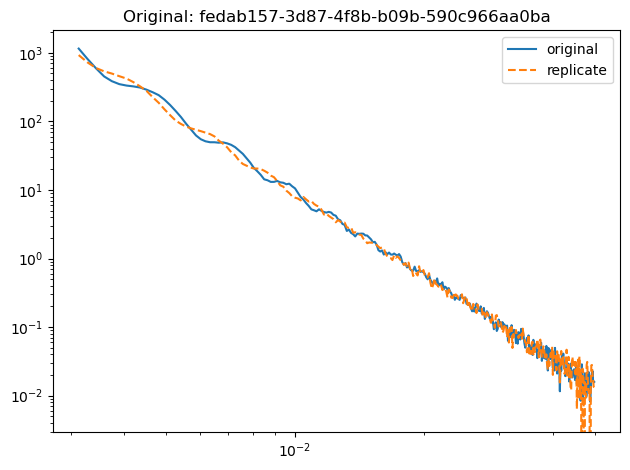

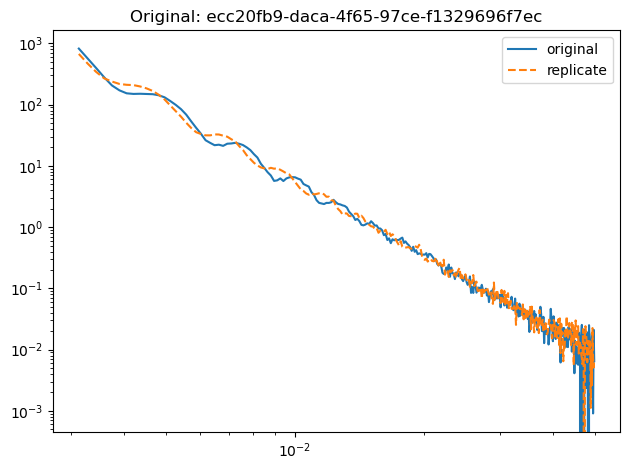

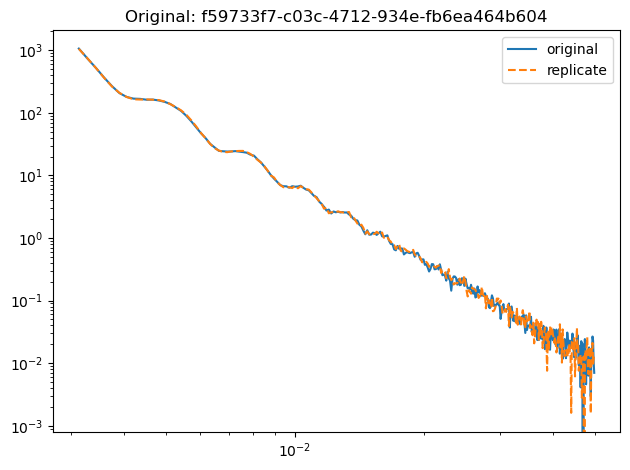

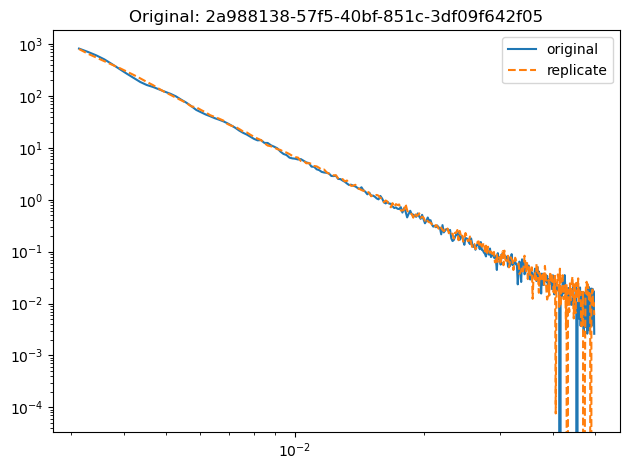

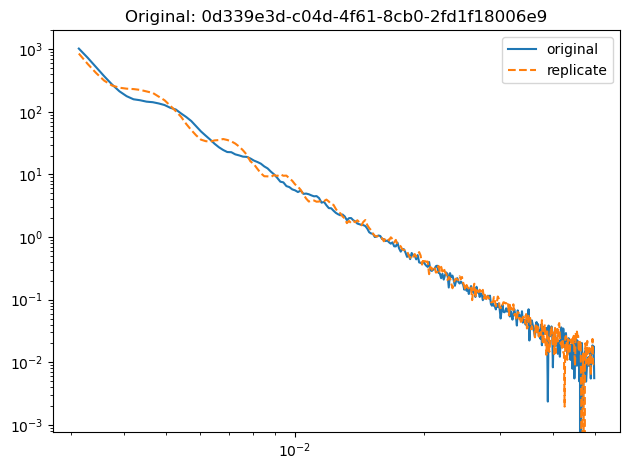

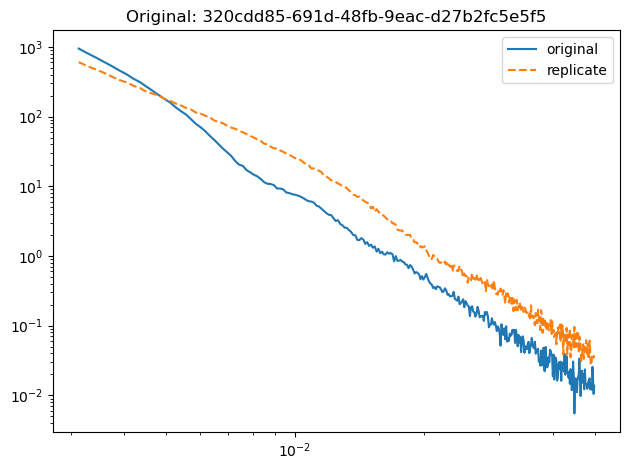

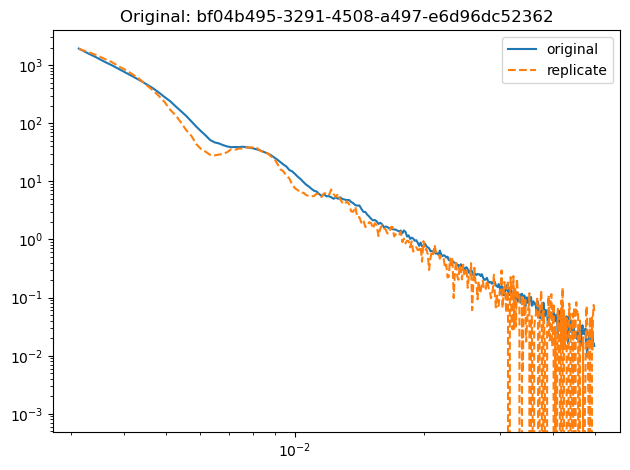

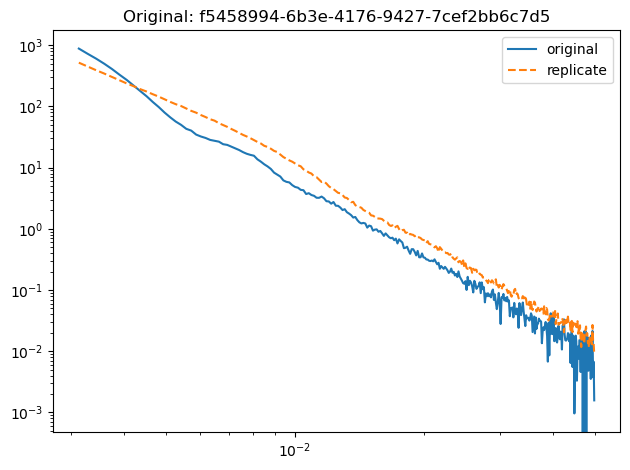

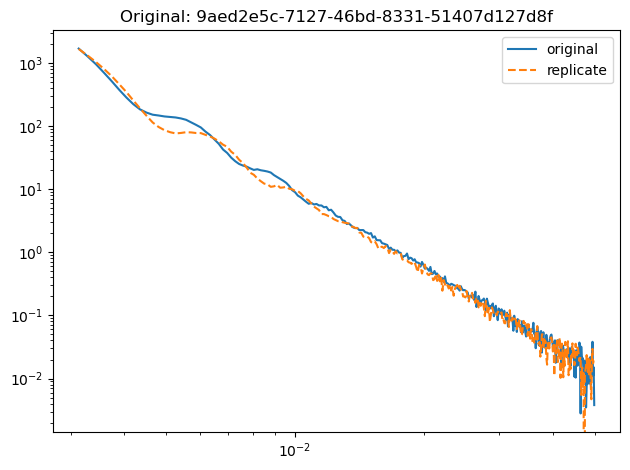

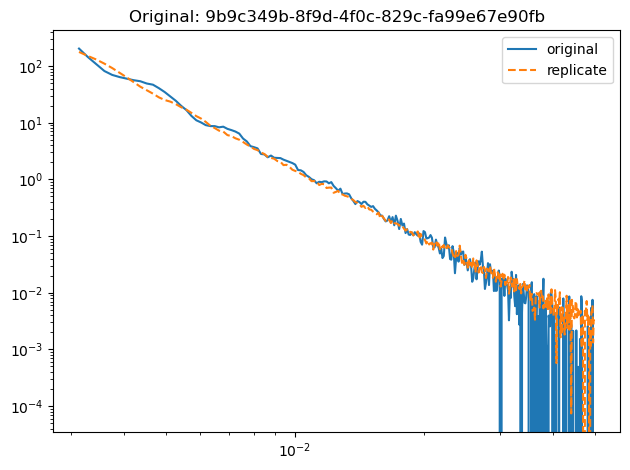

In [53]:
for key, val in uuid_mapping.items():
    try:
        original = original_data[key][0]
        replicate = replicate_data[val][0]
    except KeyError:
        print(f'Incomplete entry for pair {key}:{val}')
        continue
        
        
    # range select
    original = chop_data(original, qmin, qmax)
    replicate = chop_data(replicate, qmin, qmax)
    
    replicate = manipulate.interpolate_on_q(original, replicate)
    replicate = manipulate.scale_data(original, replicate, qmin, qmax)
    
    fig, ax = plt.subplots(1,1)
    
    ax.loglog(original.q, original.I, ls = 'solid', label = 'original')
    ax.loglog(replicate.q, replicate.I, ls = '--', label = 'replicate')
    
    
    ax.legend()
    
    ax.set_title(f'Original: {key}')
    
    plt.tight_layout()
    
    plt.savefig(f'replicate_plot_{key}.png', dpi = 300)
    

In [49]:
original

,q,I,sig
9,0.003226,680.557498,8.391142
10,0.003566,574.976121,4.268591
11,0.003905,466.012067,2.413604
12,0.004245,389.592417,1.373186
13,0.004584,315.450690,0.853439
...,...,...,...
142,0.048391,0.015015,0.002173
143,0.048730,0.012764,0.002010
144,0.049070,0.010288,0.002019
145,0.049409,0.010003,0.002115


In [50]:
replicate

,q,I,sig
20,0.003133,1248.978790,4.265987
21,0.003285,1138.333130,3.931312
22,0.003438,1029.833380,3.709791
23,0.003591,923.788647,3.450163
24,0.003744,820.047356,3.006238
...,...,...,...
322,0.049282,0.013441,0.005190
323,0.049435,0.028277,0.005997
324,0.049588,0.016074,0.005612
325,0.049740,0.014376,0.005522
